<b> MIS 382N: ADVANCED MACHINE LEARNING </b>

Assignment 5

Total points: 55

Due:  to be submitted via Canvas by 11:59 pm, Mon Nov 21st.

Your homework should be written in a python notebook. If you prefer, you can work in groups of two. **Please note that only one student per team needs to submit the assignment on Canvas but make sure to include both students' names and UT EIDs.**

For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment. You may write your solution using markdown as well.

Please make sure your code runs and the graphs and figures are displayed in your notebook before submitting. (%matplotlib inline)

**Additionally, upload any images you plan to incorporate in your notebook as attachments so we can see them in case the uploaded images don't appear properly on our end.**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Ruchi Sharma \
EID: rs58898

Name: Samarth Mishra \
EID: sm79247

### Question 1: Ensemble Methods [10 pts]
Read this [article](https://towardsdatascience.com/catboost-vs-light-gbm-vs-xgboost-5f93620723db) on different boosting methods. Briefly describe the main advantages and disadvantages of  CatBoost as compared to XGBoost.

##### Answer: 

The current place for most, if not all machine learning algorithm is that they ingest categorical features with one-hot-encoding. But this can increase the feature space monumentally leading to a sparse dataframe that can simply make your model take too long to train, especially if it runs frequently in a production environment. One main advantage of CatBoost is that it uses ordered target encoding, which essentially allows you to keep the feature/column in its original state.

The above stated characteristic makes CatBoost easier to use than popular algorithms like XGBoost because it does not require the extra step of pre-processing data. Unlike CatBoost, XGBoost cannot handle categorical features by itself, it only accepts numerical values similar to Random Forest. Therefore one has to perform various encodings like label encoding, mean encoding or one-hot encoding before supplying categorical data to XGBoost.

For CatBoost, if a column having string values is not provided in the cat_features, it throws an error. Also, a column having default int type will be treated as numeric by default, one has to specify it in cat_features to make the algorithm treat it as categorical. For remaining categorical columns which have unique number of categories greater than one_hot_max_size, CatBoost uses an efficient method of encoding which is similar to mean encoding but reduces overfitting. The process goes like this: 

1. Permuting the set of input observations in a random order. Multiple random permutations are generated
2. Converting the label value from a floating point or category to an integer
3. All categorical feature values are transformed to numeric values using the following formula: avg_target = (countInClass + prior) / (totalCount+1) - where, CountInClass is how many times the label value was equal to “1” for objects with the current categorical feature value. Prior is the preliminary value for the numerator. It is determined by the starting parameters. TotalCount is the total number of objects (up to the current one) that have a categorical feature value matching the current one.


Another reason why CatBoost is being widely used is that it works well with the default set of hyperparameters. Hence, as a user, we do not have to spend a lot of time tuning the hyperparameters. In general, CatBoost grows a balanced tree and can handle missing values as XGB does. XGBoost is available in Python, R, Java, Ruby, Swift, Julia, C, and C++. While, CatBoost is developed and maintained by the Russian search engine Yandex and is available in Python, R, C++, Java, and also Rust. CatBoost distinguishes itself from LightGBM and XGBoost by focusing on optimizing decision trees for categorical variables, or variables whose different values may have no relation with each other

Summarizing the key features of CatBoost that make it better than it's counterpart XGBoost:
1. Symmetric Trees: CatBoost builds symmetric (balanced) trees, unlike XGBoost and LightGBM. In every step, leaves from the previous tree are split using the same condition. The feature-split pair that accounts for the lowest loss is selected and used for all the level’s nodes. This balanced tree architecture aids in efficient CPU implementation, decreases prediction time, makes swift model appliers, and controls overfitting as the structure serves as regularization. 

2. Ordered boosting:  Classic boosting algorithms are prone to overfitting on small/noisy datasets due to a problem known as prediction shift. When calculating the gradient estimate of a data instance, these algorithms use the same data instances that the model was built with, thus having no chances of experiencing unseen data. CatBoost, on the other hand, uses the concept of ordered boosting, a permutation-driven approach to train model on a subset of data while calculating residuals on another subset, thus preventing target leakage and overfitting.

3. Native feature support: CatBoost supports all kinds of features be it numeric, categorical, or text and saves time and effort of preprocessing. CatBoost handles numeric features like other tree-based algorithms, i.e. by selecting the best possible split based on the information gain. CatBoost provides the various native strategies to handle categorical variables. Also, CatBoost also handles text features (containing regular text) by providing inherent text preprocessing using Bag-of-Words (BoW), Naive-Bayes, and BM-25 (for multiclass) to extract words from text data, create dictionaries (letter, words, grams), and transform them into numeric features. This text transformation is fast, customizable, production-ready, and can be used with other libraries too, including Neural networks.

4. Ranking: Ranking techniques are applied majorly to search engines to solve search relevancy problems. Ranking can be broadly done under three objective functions: Pointwise, Pairwise, and Listwise. The difference on a high level of these three objective functions is the number of instances under consideration at the time of training your model. CatBoost has a ranking mode – CatBoostRanking just like XGBoost ranker and LightGBM ranker, however, it provides many more powerful variations than XGBoost and LightGBM.

5. Speed: CatBoost provides scalability by supporting multi-server distributed GPUs (enabling multiple hosts for accelerated learning) and accommodating older GPUs. It has set some CPU and GPU training speed benchmarks on large datasets like Epsilon and Higgs. Its prediction time came out to be faster than XGBoost and LightGBM; this is extremely important for low latency environments.

6. Model analysis: CatBoost provides inherent model analysis tools to help understand, diagnose and refine machine learning models with the help of efficient statistics and visualization: PredictionValuesChange, LossFunctionChange, InternalFeatureImportance, SHAP (SHapley Additive exPlanations) 

7. Overfitting detector: CatBoost’s algorithm structure inhibits gradient boosting biases and overfitting. In addition, CatBoost has an overfitting detector that can stop training earlier than the training parameters dictate if overfitting occurs. 

8. Missing value support: CatBoost provides three inherent missing values strategies for processing missing values

9. CatBoost viewer: In addition to the CatBoost model analysis tool, CatBoost has a standalone executable application for plotting charts with different training statistics in a browser.

Summarizing disadvantages of CatBoost as compared with XGBoost:
1. As of CatBoost version 0.6, a trained CatBoost tree can predict extraordinarily faster than either XGBoost or LightGBM. On the flip side, some of CatBoost's internal identification of categorical data slows its training time significantly in comparison to XGBoost, but it is still reported much faster than XGBoost.

2. It performs only better than other algorithms only when we have categorical data. 

3. CatBoost can perform poorly if the variables are not properly tuned. 

### Question 2 : Ensemble Methods for Classification [25 pts]

We look at the following dataset [GiveMeSomeCredit](https://www.kaggle.com/c/GiveMeSomeCredit) for this question. The dataset is extremely large so for this question we only consider a subset of the data which has been provided along with the notebook for this assignment.
The task is to predict the probability that someone will experience financial distress in the next two years. The dataset has already been split into train and test sets.

In [51]:
import warnings
warnings.filterwarnings("ignore")

In [52]:
import pandas as pd

data = pd.read_csv('hw5_data.csv')
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.571373,66,0,0.430620,9274.0,10,0,1,0,0.0
1,0,0.233999,56,0,0.257380,5656.0,12,0,0,0,0.0
2,0,0.299270,33,0,0.114575,4747.0,8,0,0,0,3.0
3,0,0.032165,41,0,0.308326,8490.0,8,0,1,0,0.0
4,0,0.050591,36,0,0.862627,3333.0,8,0,2,0,0.0


In [53]:
from sklearn.model_selection import train_test_split
y = data['SeriousDlqin2yrs']
X = data.drop(['SeriousDlqin2yrs'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7)

print('train',X_train.shape,y_train.shape)
print('test',X_test.shape,y_test.shape)

train (3750, 10) (3750,)
test (1250, 10) (1250,)


In this question, we will compare performance of different ensemble methods for classification problems: [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html), [AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html), and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) Classifiers.

In [54]:
import matplotlib.pyplot as plt
from sklearn.model_selection import (train_test_split,GridSearchCV)
from sklearn.metrics import (accuracy_score,roc_auc_score)
from sklearn.ensemble import (RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier)
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from time import time
%matplotlib inline

In [55]:
columns_list = list(X.columns)

a) [2.5 pts] Use a Decision Tree Classifier with random_state = 14 for the classification problem. Report the accuracy_score and roc_auc_score on the test data for the classifier.

In [65]:
# Part a)

from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

clf = tree.DecisionTreeClassifier(random_state = 14)
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Decision Tree Classifier")

print("\nFor Test Set: \n", confusion_matrix(y_test, y_pred))
print("\nROC_AUC_Score: \n", roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))
print("\nAccuracy Score: \n", accuracy_score(y_test, y_pred))

Decision Tree Classifier

For Test Set: 
 [[1090   75]
 [  65   20]]

ROC_AUC_Score: 
 0.5854582176218127

Accuracy Score: 
 0.888


b) [2.5 pts] Create an ensemble of 25 classifiers (i.e n_estimators = 25) with random_state = 14 for [bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) with base classifier as Decision Tree Classifier from part a). Report accuracy_score and roc_auc_score on the test data for the Bagging classifiers. 

In [66]:
# Part b)

from sklearn.ensemble import BaggingClassifier

clf2 = BaggingClassifier(base_estimator=clf,
                        n_estimators=25, random_state=14).fit(X_train, y_train)
y_pred_2 = clf2.predict(X_test)

print("Bagging x Decision Tree Classifier")

print("\nFor Test Set: \n", confusion_matrix(y_test, y_pred_2))
print("\nROC_AUC_Score: \n", roc_auc_score(y_test, clf2.predict_proba(X_test)[:, 1]))
print("\nAccuracy Score: \n", accuracy_score(y_test, y_pred_2))

Bagging x Decision Tree Classifier

For Test Set: 
 [[1146   19]
 [  74   11]]

ROC_AUC_Score: 
 0.7857106791214341

Accuracy Score: 
 0.9256


c) [5 pts] Use the training data and build a [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) model for the classification problem. Find the best parameters (including *n_estimators*, *max_features* and *criterion*) using [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Report the optimal parameters obtained by GridSearch. Report the confusion matrix  and [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) on test data using the model fit with best parameters.

In [58]:
# Part c)
clf = RandomForestClassifier()

param_grid = {"n_estimators": [1, 10, 50, 100],
              "max_features": [1, 5, 10, "auto"],
              "criterion": ['gini','entropy'],
              "random_state": [17]}

# Grid search
rf_best = GridSearchCV(clf, param_grid)
rf_best.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': [1, 5, 10, 'auto'],
                         'n_estimators': [1, 10, 50, 100],
                         'random_state': [17]})

In [59]:
rf_best.best_params_

{'criterion': 'entropy',
 'max_features': 1,
 'n_estimators': 100,
 'random_state': 17}

In [60]:
y_pred_3 = rf_best.predict(X_test)

print("Random Forest")

print("\nFor Test Set: \n", confusion_matrix(y_test, y_pred_3))
print("\nROC_AUC_Score: \n", roc_auc_score(y_test, rf_best.predict_proba(X_test)[:, 1]))
print("\nAccuracy Score: \n", accuracy_score(y_test, y_pred_3))

Random Forest

For Test Set: 
 [[1162    3]
 [  82    3]]

ROC_AUC_Score: 
 0.8375612219136582

Accuracy Score: 
 0.932


d) [5 pts] Use [AdaBoost](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) for this problem. Again, find the best parameters (including *n_estimators, learning_rate*), and report the confusion matrix and roc_auc_score on test data for the classifier fit with best parameters found using training data.

In [61]:
# Part d)

clf = AdaBoostClassifier()

param_grid = {"n_estimators": [10, 100],
          "learning_rate": [0.01, 0.1, 0.5],
          "random_state": [17]
          }

# Grid search
rf_best2 = GridSearchCV(clf, param_grid)
rf_best2.fit(X_train, y_train)

print(rf_best2.best_params_)

y_pred_4 = rf_best2.predict(X_test)

print("AdaBoost")

print("\nFor Test Set: \n", confusion_matrix(y_test, y_pred_4))
print("\nROC_AUC_Score: \n", roc_auc_score(y_test, rf_best2.predict_proba(X_test)[:, 1]))
print("\nAccuracy Score: \n", accuracy_score(y_test, y_pred_4))

{'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 17}
AdaBoost

For Test Set: 
 [[1153   12]
 [  72   13]]

ROC_AUC_Score: 
 0.8390254986114618

Accuracy Score: 
 0.9328


e) [5 pts] Use [Gradient Boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) for this problem. Again, find the best parameters (including *n_estimators, learning_rate*), and report the confusion matrix and roc_auc_score on test data for the classifier fit with best parameters found using training data.

In [62]:
# Part e)

clf = GradientBoostingClassifier()

param_grid = {"n_estimators": [10, 100],
          "learning_rate": [0.01, 0.1, 0.5],
          "random_state": [17]
          }

# Grid search

rf_best3 = GridSearchCV(clf, param_grid)
rf_best3.fit(X_train, y_train)

print(rf_best3.best_params_)

y_pred_5 = rf_best3.predict(X_test)

print("Gradient Boosting")

print("\nFor Test Set: \n", confusion_matrix(y_test, y_pred_5))
print("\nROC_AUC_Score: \n", roc_auc_score(y_test, rf_best3.predict_proba(X_test)[:, 1]))
print("\nAccuracy Score: \n", accuracy_score(y_test, y_pred_5))

{'learning_rate': 0.1, 'n_estimators': 10, 'random_state': 17}
Gradient Boosting

For Test Set: 
 [[1164    1]
 [  84    1]]

ROC_AUC_Score: 
 0.8366372128250441

Accuracy Score: 
 0.932


f) [5 pts] Compare the performance of decision tree from part a) with the ensemble methods, Briefly explain which of the three ensemble method performed better and why?

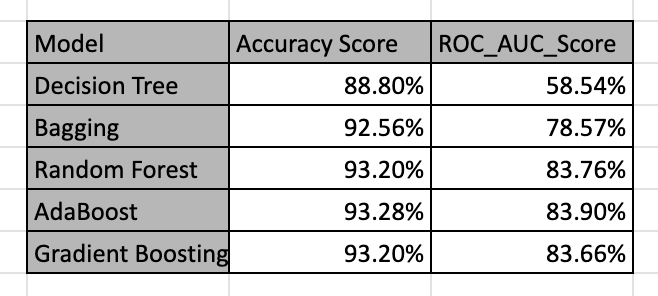

In [67]:
# Part f)

%matplotlib inline
from PIL import Image

Image.open("q2.png") 

Evidently, the ensemble learning methods perform better than simple Decision Tree with considerable improvement in the ROC_AUC_Score. Boosting Method gives the best performance and AdaBoost exceeds Gradient Boosting only slightly. 

### Question 3: XGBoost on Datasets with varying Class Imbalance [15 points]

You are given three datasets (all extracted from the [GiveMeSomeCredit](https://www.kaggle.com/c/GiveMeSomeCredit) dataset which was used in the last question). They have varying levels of class imbalance (positive to negative class ratio):
1. dataset_equally_biased_final has a class ratio of 1:1
2. dataset_originally_biased_final has a class ratio of 1:15
3. dataset_highly_biased_final has a class ratio of 1:39

Use [XGBoost](https://xgboost.readthedocs.io/en/stable/python/python_api.html) on these three datasets and plot the [calibration curves](https://scikit-learn.org/stable/modules/generated/sklearn.calibration.calibration_curve.html#sklearn.calibration.calibration_curve) for your predictions. Examine both uniform and quantile binning strategies for your plots and observe how the plots look. For which of the datasets is you model calibrated the best? Which of the binning strategies provide more informative visualization for each of the datasets?

In [28]:
from sklearn.model_selection import train_test_split
import pandas as pd

dataset = pd.read_csv("data_equally_biased_final.csv")
X = dataset.drop(['SeriousDlqin2yrs'], axis=1)
y = dataset['SeriousDlqin2yrs']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)
print("Balanced Dataset")
# Number of classes in training Data
print(y_train1.value_counts())
# Number of classes in test Data
print(y_test1.value_counts())

dataset = pd.read_csv("data_originally_biased_final.csv")
X = dataset.drop(['SeriousDlqin2yrs'], axis=1)
y = dataset['SeriousDlqin2yrs']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)
print("Originally Imbalanced Dataset")
# Number of classes in training Data
print(y_train2.value_counts())
# Number of classes in test Data
print(y_test2.value_counts())

dataset = pd.read_csv("data_highly_biased_final.csv")
X = dataset.drop(['SeriousDlqin2yrs'], axis=1)
y = dataset['SeriousDlqin2yrs']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)
print("Highly Imbalanced Dataset")
# Number of classes in training Data
print(y_train3.value_counts())
# Number of classes in test Data
print(y_test3.value_counts())

Balanced Dataset
0    4000
1    4000
Name: SeriousDlqin2yrs, dtype: int64
0    1000
1    1000
Name: SeriousDlqin2yrs, dtype: int64
Originally Imbalanced Dataset
0    7466
1     534
Name: SeriousDlqin2yrs, dtype: int64
0    1866
1     134
Name: SeriousDlqin2yrs, dtype: int64
Highly Imbalanced Dataset
0    7800
1     200
Name: SeriousDlqin2yrs, dtype: int64
0    1950
1      50
Name: SeriousDlqin2yrs, dtype: int64


In [32]:
import matplotlib.pyplot as plt
from sklearn.model_selection import (train_test_split,GridSearchCV)
from sklearn.metrics import (accuracy_score,roc_auc_score)
from sklearn.ensemble import (RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier)
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from time import time
import xgboost

%matplotlib inline

In [33]:
# Using the earlier dataset and applying XGBoost on it

clf = xgboost.XGBClassifier()

param_grid = {"n_estimators": [10, 100],
          "learning_rate": [0.01, 0.1, 0.5],
          "random_state": [17]
          }

# Grid search
grid_search = GridSearchCV(clf, param_grid=param_grid)

# Balanced Dataset
print("Balanced Dataset")
grid_search.fit(X_train1, y_train1)
print(grid_search.best_params_)
clf.set_params(**grid_search.best_params_)

t0 = time()
clf.fit(X_train1, y_train1)
print("training time", round(time()-t0, 3), "s")

t0 = time()
y_pred_gbt1 = clf.predict(X_test1)
print("predict time", round(time()-t0, 3), "s")

print("XGBoost conf matrix: ")
print(confusion_matrix(y_test1, y_pred_gbt1))

y_pred_proba1 = clf.predict_proba(X_test1)[:,1]

acc_score = accuracy_score(y_test1,y_pred_gbt1)
auc_score = roc_auc_score(y_test1,y_pred_proba1)
print("Accuracy: {}\n AUC_ROC: {}\n".format(acc_score,auc_score))


# Originally Imbalanced Dataset

print("Originally Imbalanced Dataset")
grid_search.fit(X_train2, y_train2)
print(grid_search.best_params_)
clf.set_params(**grid_search.best_params_)

t0 = time()
clf.fit(X_train2, y_train2)
print("training time", round(time()-t0, 3), "s")

t0 = time()
y_pred_gbt2 = clf.predict(X_test2)
print("predict time", round(time()-t0, 3), "s")

print("XGBoost conf matrix: ")
print(confusion_matrix(y_test2, y_pred_gbt2))

y_pred_proba2 = clf.predict_proba(X_test2)[:,1]

acc_score = accuracy_score(y_test2,y_pred_gbt2)
auc_score = roc_auc_score(y_test2,y_pred_proba2)
print("Accuracy: {}\n AUC_ROC: {}\n".format(acc_score,auc_score))

# Highly Imalanced Dataset

print("Highly Imbalanced Dataset")
grid_search.fit(X_train3, y_train3)
print(grid_search.best_params_)
clf.set_params(**grid_search.best_params_)

t0 = time()
clf.fit(X_train3, y_train3)
print("training time", round(time()-t0, 3), "s")

t0 = time()
y_pred_gbt3 = clf.predict(X_test3)
print("predict time", round(time()-t0, 3), "s")

print("XGBoost conf matrix: ")
print(confusion_matrix(y_test3, y_pred_gbt3))

y_pred_proba3 = clf.predict_proba(X_test3)[:,1]

acc_score = accuracy_score(y_test3,y_pred_gbt3)
auc_score = roc_auc_score(y_test3,y_pred_proba3)
print("Accuracy: {}\n AUC_ROC: {}\n".format(acc_score,auc_score))

Balanced Dataset
{'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 17}
training time 0.806 s
predict time 0.005 s
XGBoost conf matrix: 
[[794 206]
 [228 772]]
Accuracy: 0.783
 AUC_ROC: 0.856863

Originally Imbalanced Dataset
{'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 17}
training time 0.753 s
predict time 0.005 s
XGBoost conf matrix: 
[[1843   23]
 [ 114   20]]
Accuracy: 0.9315
 AUC_ROC: 0.8342691686263217

Highly Imbalanced Dataset
{'learning_rate': 0.01, 'n_estimators': 100, 'random_state': 17}
training time 0.709 s
predict time 0.005 s
XGBoost conf matrix: 
[[1945    5]
 [  50    0]]
Accuracy: 0.9725
 AUC_ROC: 0.8398564102564102



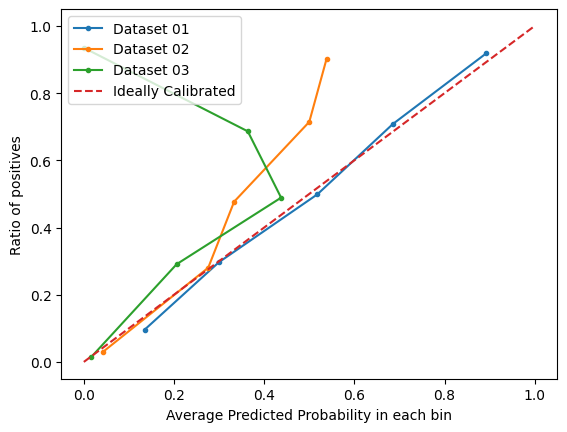

In [47]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Plot all calibration curves for strategy = 'uniform' (It is uniform by default)

prob_true1, prob_pred1 = calibration_curve(y_test1, y_pred_proba1, normalize = True)
plt.plot(prob_true1, prob_pred1, marker = '.', label = 'Dataset 01')

prob_true2, prob_pred2 = calibration_curve(y_test2, y_pred_proba2, normalize = True)
plt.plot(prob_true2, prob_pred2, marker = '.', label = 'Dataset 02')

prob_true3, prob_pred3 = calibration_curve(y_test3, y_pred_proba3, normalize = True)
plt.plot(prob_true3, prob_pred3, marker = '.', label = 'Dataset 03')

plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Ideally Calibrated')
  
leg = plt.legend(loc = 'upper left')
plt.xlabel('Average Predicted Probability in each bin')
plt.ylabel('Ratio of positives')
plt.show()

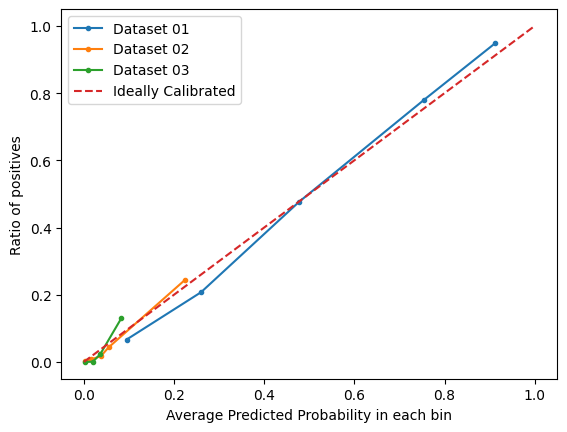

In [45]:
# Plot all calibration curves for strategy = 'quantile'

prob_true1, prob_pred1 = calibration_curve(y_test1, y_pred_proba1, strategy = 'quantile', normalize = True)
plt.plot(prob_true1, prob_pred1, marker = '.', label = 'Dataset 01')

prob_true2, prob_pred2 = calibration_curve(y_test2, y_pred_proba2, strategy = 'quantile', normalize = True)
plt.plot(prob_true2, prob_pred2, marker = '.', label = 'Dataset 02')

prob_true3, prob_pred3 = calibration_curve(y_test3, y_pred_proba3, strategy = 'quantile', normalize = True)
plt.plot(prob_true3, prob_pred3, marker = '.', label = 'Dataset 03')

plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Ideally Calibrated')
 
leg = plt.legend(loc = 'upper left')
plt.xlabel('Average Predicted Probability in each bin')
plt.ylabel('Ratio of positives')
plt.show()

### Question 4: Deep Learning Mechanisms [5 points]

Briefly explain the motivation behind the following mechanisms commonly used in deep learning: <br>
a) [2.5 pts] Skip connections <br>
b) [2.5 pts] Batch normalization

##### Answer:

##### a) Skip Connections

The beauty of deep neural networks is that they can learn complex functions more efficiently than their shallow counterparts. While training deep neural nets, the performance of the model drops down with the increase in depth of the architecture. This is known as the degradation problem. One of the possible reasons could be overfitting. Another possible reason can be vanishing gradient and/or exploding gradient problems.  Experiments prove that the deeper network produces high training error comparing to the shallow one. This states the inability of deeper layers to learn even identity mappings. The degradation of training accuracy indicates that not all systems are similarly easy to optimize. One of the primary reasons is due to random initialization of weights with a mean around zero, L1, and L2 regularization.  As a result, the weights in the model would always be around zero and thus the deeper layers can’t learn identity mappings as well. Here comes the concept of skip connections which would enable us to train very deep neural networks.

Skip Connections (or Shortcut Connections) as the name suggests skips some of the layers in the neural network and feeds the output of one layer as the input to the next layers. Skip Connections were introduced to solve different problems in different architectures. In the case of ResNets, skip connections solved the degradation problem, in the case of DenseNets, it ensured feature reusability. 

At present, skip connection is a standard module in many convolutional architectures. By using a skip connection, we provide an alternative path for the gradient (with backpropagation). It is experimentally validated that this additional paths are often beneficial for the model convergence. Skip connections in deep architectures, as the name suggests, skip some layer in the neural network and feeds the output of one layer as the input to the next layers (instead of only the next one).

In general, there are two fundamental ways that one could use skip connections through different non-sequential layers: a) addition as in residual architectures; b) concatenation as in densely connected architectures.

##### b) Batch Normalization

Training deep neural networks with tens of layers is challenging as they can be sensitive to the initial random weights and configuration of the learning algorithm. One possible reason for this difficulty is the distribution of the inputs to layers deep in the network may change after each mini-batch when the weights are updated. This can cause the learning algorithm to forever chase a moving target. This change in the distribution of inputs to layers in the network is referred to the technical name “internal covariate shift. Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.

Normalization is a data pre-processing tool used to bring the numerical data to a common scale without distorting its shape. Generally, when we input the data to a machine or deep learning algorithm we tend to change the values to a  balanced scale. The reason we normalize is partly to ensure that our model can generalize appropriately. Batch normalization is a process to make neural networks faster and more stable through adding extra layers in a deep neural network. The new layer performs the standardizing and normalizing operations on the input of a layer coming from a previous layer. It is "batch" normalization as a typical neural network is trained using a collected set of input data called batch. Similarly, the normalizing process in batch normalization takes place in batches, not as a single input.

Batch normalization is performed in the following way:
1. Batch normalization does the scaling the output of the layer, explicitly by normalizing the activations of each input variable per mini-batch, for example, the enactments of a node from the last layer. Review that normalization alludes to rescaling data to have a mean of zero and a standard deviation of one.
2. By brightening the inputs to each layer, it would make a stride towards accomplishing the fixed distributions of inputs that would evacuate the ill impacts of the internal covariate shift.
3. Normalizing the activations of the earlier layer implies that presumptions the ensuing layer makes about the spread and distribution of inputs during the weight update won’t change, in any event not significantly. This has the impact of stabilizing and accelerating the preparation training procedure of deep neural networks.
4. For little smaller mini-batches that don’t contain an agent distribution of models from the training dataset, the distinctions in the normalized inputs among training and inference (utilizing the model subsequent to training) can bring about perceptible contrasts in execution performance. This can be tended to with a change of the technique called Batch Renormalization that makes the appraisals of the variable mean and standard deviation increasingly stable across mini-batches.
5. This normalization of inputs might be applied to the input variable for the first hidden layer or to the activation from a hidden layer for more profound layers.